In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# open dataswet raw data sien
df = pd.read_csv('datasets/raw_data_sien.csv')
df

,entry_num,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2),Time (s).1,X (rad/s),Y (rad/s),Z (rad/s),name_climber,grading,num_attempt,fall_top,climbers_rating
0,15,0.202257,0.616807,0.545096,-0.119170,0.202257,-0.738735,-0.693665,-0.053444,sien,4c,1,0,easy
1,15,0.403552,0.427085,-0.449999,0.075464,0.403552,-0.314339,-0.378076,0.015612,sien,4c,1,0,easy
2,15,0.604846,0.570240,0.152899,-0.213106,0.604846,-0.273812,-0.442562,-0.130227,sien,4c,1,0,easy
3,15,0.806141,0.295633,-0.453686,0.244799,0.806141,-0.260747,-0.114135,-0.019194,sien,4c,1,0,easy
4,15,1.007435,0.206272,-0.927811,-0.512616,1.007435,-0.160211,-0.226173,-0.211577,sien,4c,1,0,easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,16,124.773971,2.296552,10.494504,-1.733397,124.773971,-0.084969,0.525306,0.285874,sien,5b+,1,1,medium
10462,16,124.975276,3.870164,6.088887,-2.431471,124.975276,-0.527046,-0.590914,0.021763,sien,5b+,1,1,medium
10463,16,125.176582,-0.734544,-1.173042,-0.260381,125.176582,-0.850518,-0.331603,-0.304887,sien,5b+,1,1,medium
10464,16,125.377887,-0.742510,-3.654027,-0.197465,125.377887,-0.445577,-0.465916,-0.054503,sien,5b+,1,1,medium


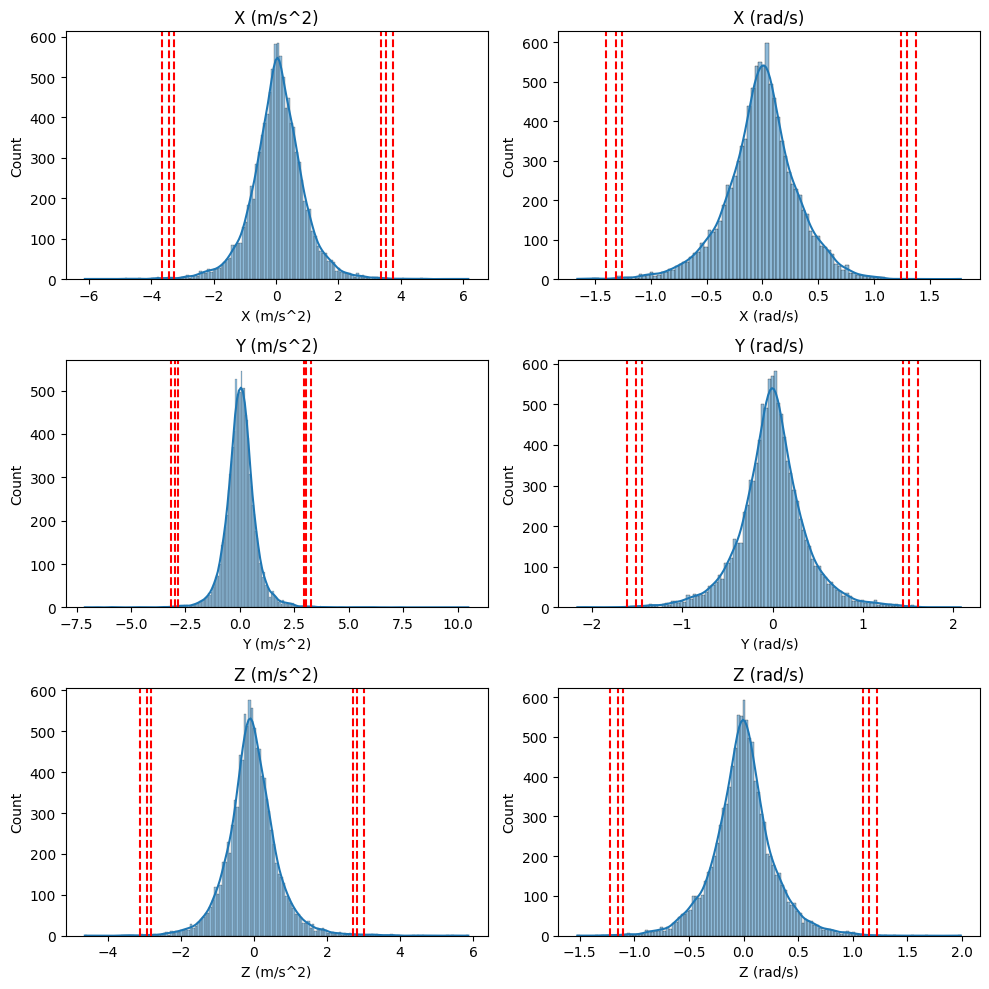

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
selected_columns = df.columns[df.columns.str.contains('X|Y|Z')]

df = df[selected_columns]

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axs[i%3, i//3]) 
    mean = df[col].mean()
    std = df[col].std()
    axs[i%3, i//3].set_title(col) 
    # Calculate Chauvenet's criterion
    N = len(df[col])
    for c in [1, 3, 6]:
        cutoff_high = mean + std * np.sqrt(2*np.log(N/c))
        cutoff_low = mean - std * np.sqrt(2*np.log(N/c))
        # Add vertical lines for the cutoff points
        axs[i%3, i//3].axvline(cutoff_low, color='r', linestyle='--')
        axs[i%3, i//3].axvline(cutoff_high, color='r', linestyle='--')
        
        
    

plt.tight_layout()
plt.show()


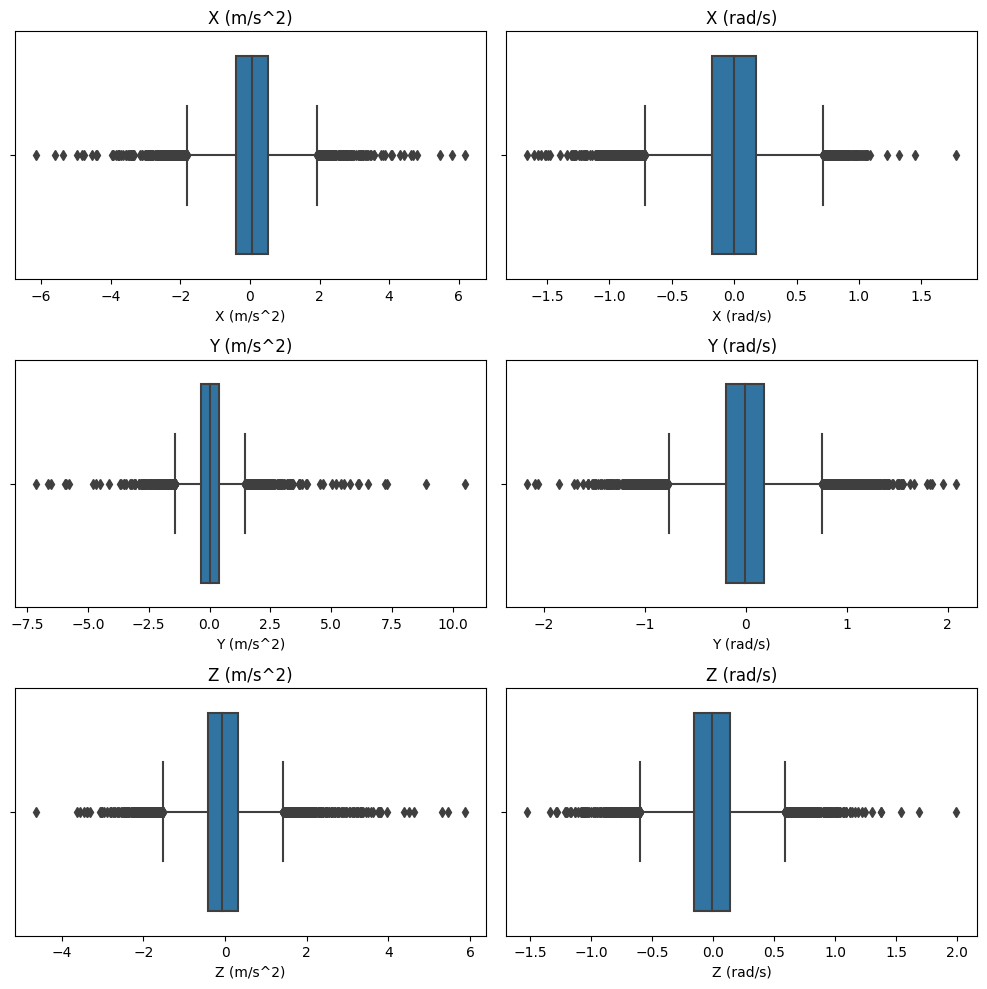

In [5]:
# make boxplots for selected columns
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
 # use seaborn to make boxplots
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axs[i%3, i//3])
    axs[i%3, i//3].set_title(col)
plt.tight_layout()